<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/DL_Elwing_Class/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E4%B8%8A%E8%AA%B2_0716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 07/14 深度學習
 * Minst迷思特手寫辨認

import keras (不要用) -> import tensorflow.keras (用這個)  
tensorflow2 做兩件事
* 1. 整合keras
* 2. gpu整合(?)

In [1]:
from tensorflow.keras.datasets import mnist #mnist手寫數字資料集
mnist.load_data() #資料

11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
#找出訓練資料與測試資料
# 資料型態 ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data() #函數會返回兩個元組。第一個元組包含訓練數據（x_train）和訓練標籤（y_train），第二個元組包含測試數據（x_test）和測試標籤（y_test）
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#查看訓練資料x_train
import pandas as pd
# 0: 黑 255: 白
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


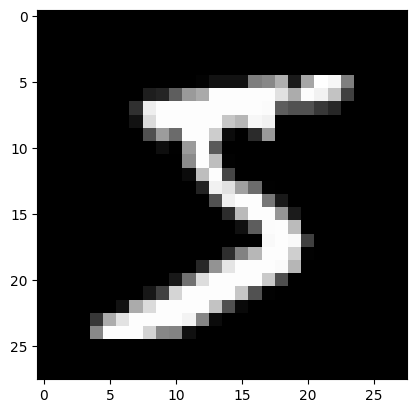

In [ ]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
plt.imshow(x_train[0], cmap="gray") #gray_r->顏色相反

In [7]:
#訓練資料(28*28)，要攤平成1條線
#.reshape概念
# 你可以試試看用x_test話個tsne
import numpy as np
x_train_1d = x_train.reshape(-1, 784) #轉換成1長條x
x_test_1d = x_test.reshape(-1, 784)
print(x_train_1d.shape)
print(x_test_1d.shape)

(60000, 784)
(10000, 784)


In [ ]:
# #.reshape概念
# import numpy as np
# n=np.array([1,2,3,4,5,6])

# # n.shape #n 是一個一維數組，包含 6 個元素，所以其形狀為 (6,)
# # n.reshape(2,3)
# # n.reshape(3,-1) #-1系統會幫你算
# n.reshape(1,6) #與[1,2,3,4,5,6]差異? 原本為list，現在為表格
# # n.reshape(-1,6) #與[1,2,3,4,5,6]差異? 原本為list，現在為表格

array([[1, 2, 3, 4, 5, 6]])

* 2-1: 2層dense採sigmoid(最後輸出機率不等於1)

In [8]:
#2-1: 2層dense採sigmoid(最後輸出機率不等於1)
# 將128層模型導入 ->1. Model 2. Layer
from tensorflow.keras.models import Sequential #Sequential由多個網路層線性堆疊
from tensorflow.keras.layers import Dense # Dense->稠密層/全連接層(Fully-Connected)；每個神經元都與前一層的所有神經元相連
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="sigmoid", input_dim=784), #第一個 Dense 層有 128 個神經元 #使用 sigmoid 激活函數 #input_dim=x輸入數據的維度是 784
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="sigmoid")
]
model = Sequential(layers) #創建了一個 Sequential 模型，並將前面定義的層添加到模型中
model.summary() #輸出了模型的摘要信息，包括每層的名稱、類型、輸出形狀以及參數數量

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
#定義loss函式
model.compile(loss="mse", #設定損失函數為均方誤差（Mean Squared Error）
       metrics=["accuracy"]) #設定評估指標為準確度（Accuracy）->電腦會幫你多算幾種方式提高準度

In [10]:
#常態化，將輸入內容sclaing，提高後續係數調整範圍被限縮
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [11]:
#設定輸出答案(0~9=共10個答案)
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

* 開始訓練模型  
一開始什麼都沒改: 6 round(30 epochs): 180 epoch

In [12]:
#開始訓練模型
# 30 epochs: (54000 / 200) * 30
#30次訓練完，再按一次，是從31開始接續訓練
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200, #每次梯度更新時使用的樣本數量；提高運算效率
     epochs=30, #
     validation_split=0.1) #從訓練數據中保留的用於驗證的數據比例，即10% 的訓練數據將被用於驗證

Epoch 1/30
270/270 [==============================] - 3s 8ms/step - loss: 0.0672 - accuracy: 0.6087 - val_loss: 0.0403 - val_accuracy: 0.8373
Epoch 2/30
270/270 [==============================] - 2s 6ms/step - loss: 0.0352 - accuracy: 0.8394 - val_loss: 0.0261 - val_accuracy: 0.8932
Epoch 3/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0268 - accuracy: 0.8719 - val_loss: 0.0209 - val_accuracy: 0.9103
Epoch 4/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0231 - accuracy: 0.8836 - val_loss: 0.0183 - val_accuracy: 0.9152
Epoch 5/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0210 - accuracy: 0.8907 - val_loss: 0.0167 - val_accuracy: 0.9203
Epoch 6/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0195 - accuracy: 0.8969 - val_loss: 0.0156 - val_accuracy: 0.9220
Epoch 7/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0184 - accuracy: 0.9012 - val_loss: 0.0147 - val_accuracy: 0.9263
Epoch 

In [13]:
#評估訓練好的模型在測試數據集上的性能
model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0101 - accuracy: 0.9438


[0.010106240399181843, 0.9437999725341797]

In [14]:
#抓出訓練資料第一筆，看個別預測結果
model.predict(x_test_1d_norm)[0]

313/313 [==============================] - 1s 2ms/step


array([2.7166216e-03, 2.7945571e-06, 9.2823505e-03, 1.3009018e-02,
       4.5712135e-05, 4.0579899e-03, 2.8576349e-06, 9.9045193e-01,
       3.0434391e-04, 7.1889180e-04], dtype=float32)

In [15]:
#抓出訓練資料第一筆，看家總預測結果
sum(model.predict(x_test_1d_norm)[0]) #1.020輸出機率不等於1

313/313 [==============================] - 0s 2ms/step


1.0205925123252655

* 2-2 [修正輸出機率不等於1]最後一層dense採softmax

In [16]:
# 2-2:將128層模型導入 ->1. Model 2. Layer
from tensorflow.keras.models import Sequential #Sequential由多個網路層線性堆疊
from tensorflow.keras.layers import Dense # Dense->稠密層/全連接層(Fully-Connected)；每個神經元都與前一層的所有神經元相連
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="sigmoid", input_dim=784), #第一個 Dense 層有 128 個神經元 #使用 sigmoid 激活函數 #input_dim=x輸入數據的維度是 784
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers) #創建了一個 Sequential 模型，並將前面定義的層添加到模型中
model.summary() #輸出了模型的摘要信息，包括每層的名稱、類型、輸出形狀以及參數數量

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
#定義loss函式
model.compile(loss="mse", #設定損失函數為均方誤差（Mean Squared Error）
       metrics=["accuracy"]) #設定評估指標為準確度（Accuracy）->電腦會幫你多算幾種方式提高準度

In [18]:
#常態化，將輸入內容sclaing，提高後續係數調整範圍被限縮
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [19]:
#設定輸出答案(0~9=共10個答案)
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

In [20]:
#開始訓練模型
# 30 epochs: (54000 / 200) * 30
#30次訓練完，再按一次，是從31開始接續訓練
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200, #每次梯度更新時使用的樣本數量；提高運算效率
     epochs=30, #
     validation_split=0.1) #從訓練數據中保留的用於驗證的數據比例，即10% 的訓練數據將被用於驗證

Epoch 1/30
270/270 [==============================] - 2s 6ms/step - loss: 0.0567 - accuracy: 0.6389 - val_loss: 0.0287 - val_accuracy: 0.8735
Epoch 2/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0252 - accuracy: 0.8641 - val_loss: 0.0171 - val_accuracy: 0.9075
Epoch 3/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0190 - accuracy: 0.8887 - val_loss: 0.0142 - val_accuracy: 0.9175
Epoch 4/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0167 - accuracy: 0.8984 - val_loss: 0.0127 - val_accuracy: 0.9203
Epoch 5/30
270/270 [==============================] - 3s 9ms/step - loss: 0.0153 - accuracy: 0.9044 - val_loss: 0.0120 - val_accuracy: 0.9240
Epoch 6/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0145 - accuracy: 0.9086 - val_loss: 0.0113 - val_accuracy: 0.9290
Epoch 7/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0138 - accuracy: 0.9129 - val_loss: 0.0109 - val_accuracy: 0.9317
Epoch 

In [21]:
#評估訓練好的模型在測試數據集上的性能
model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9484


[0.007993311621248722, 0.9484000205993652]

In [23]:
#抓出訓練資料第一筆，看加總預測結果(等於1)
sum(model.predict(x_test_1d_norm)[0]) #0.999輸出機率等於1

313/313 [==============================] - 0s 1ms/step


0.9999998714237677

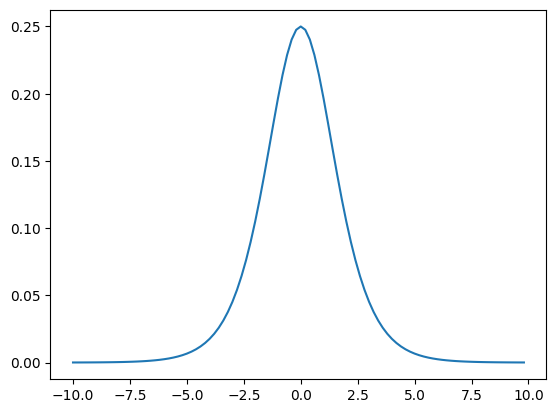

In [27]:
# #用連鎖法則證明sigmoid微分
# #目的是繪製一個函數的圖形，該函數是 sigmoid 函數的導數

# import math
# def m(x):
#     # print("!", x)
#     return math.exp(-1*x)/(1 + math.exp(-1*x))**2 # sigmoid 函數

# import matplotlib.pyplot as plt

# left = -10 #繪圖的範圍，從 -10 開始
# interval = 0.2 #設定繪圖的間隔

# #-1000 +10000* 0.2
# xs, ys = [], [] #初始化兩個空列表，用於存儲 x 和 y 的值
# for i in range(100):
#     x = left +i*interval #計算當前間隔的 x 值
#     y = m(x)
#     xs.append(x)
#     ys.append(y)
# plt. plot(xs, ys)

#### 2-3: 為減輕梯度消失，中間層採relu

In [28]:
#2-3:中間層選relu

from tensorflow.keras.models import Sequential
# 稠密層/全連接層(Fully-Connected)
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss="mse",
       metrics=["accuracy"])

In [30]:
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [31]:
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

In [32]:
# 30 epochs: (54000 / 200) * 30
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=30,
     validation_split=0.1)


Epoch 1/30
270/270 [==============================] - 2s 6ms/step - loss: 0.0254 - accuracy: 0.8471 - val_loss: 0.0121 - val_accuracy: 0.9232
Epoch 2/30
270/270 [==============================] - 2s 6ms/step - loss: 0.0131 - accuracy: 0.9176 - val_loss: 0.0093 - val_accuracy: 0.9427
Epoch 3/30
270/270 [==============================] - 2s 6ms/step - loss: 0.0108 - accuracy: 0.9319 - val_loss: 0.0079 - val_accuracy: 0.9515
Epoch 4/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0094 - accuracy: 0.9412 - val_loss: 0.0069 - val_accuracy: 0.9565
Epoch 5/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0083 - accuracy: 0.9488 - val_loss: 0.0062 - val_accuracy: 0.9623
Epoch 6/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0075 - accuracy: 0.9541 - val_loss: 0.0060 - val_accuracy: 0.9615
Epoch 7/30
270/270 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9587 - val_loss: 0.0054 - val_accuracy: 0.9685
Epoch 

In [33]:
model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9772


[0.003683735616505146, 0.9771999716758728]

In [34]:
sum(model.predict(x_test_1d_norm)[0])

313/313 [==============================] - 1s 1ms/step


1.0000000963991749

### 07/15 深度學習

In [ ]:

from tensorflow.keras.datasets import mnist
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
import pandas as pd
# 0: 黑 255: 白
pd.DataFrame(x_train[0])

In [ ]:

# 你可以試試看用x_test話個tsne
import numpy as np
x_train_1d = x_train.reshape(-1, 784)
x_test_1d = x_test.reshape(-1, 784)
print(x_train_1d.shape)
print(x_test_1d.shape)

In [ ]:
# 1. Model 2. Layer
from tensorflow.keras.models import Sequential
# 稠密層/全連接層(Fully-Connected)
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 輸出一個: 0.6 (0.6 0.4) BinaryCrossentropy p1 log(1/0.6) + p2 log(1/0.4)
# 輸出10個: CategoricalCrossentropy sigma pi log1/qi
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"])

In [ ]:
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

In [ ]:
# 30 epochs: (54000 / 200) * 30
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=30,
     validation_split=0.1)

Epoch 1/30
270/270 [==============================] - 7s 4ms/step - loss: 0.4058 - accuracy: 0.8899 - val_loss: 0.1956 - val_accuracy: 0.9480
Epoch 2/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1996 - accuracy: 0.9415 - val_loss: 0.1453 - val_accuracy: 0.9587
Epoch 3/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1450 - accuracy: 0.9585 - val_loss: 0.1116 - val_accuracy: 0.9662
Epoch 4/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9673 - val_loss: 0.1014 - val_accuracy: 0.9727
Epoch 5/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9738 - val_loss: 0.0910 - val_accuracy: 0.9737
Epoch 6/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9778 - val_loss: 0.0816 - val_accuracy: 0.9770
Epoch 7/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9814 - val_loss: 0.0791 - val_accuracy: 0.9770
Epoch 

In [ ]:
model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9796


[0.07553073018789291, 0.9796000123023987]

In [ ]:
sum(model.predict(x_test_1d_norm)[0])

313/313 [==============================] - 1s 2ms/step


1.0000000186523628

一開始什麼都沒改: 6 round(30 epochs): 180 epoch

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# 30 epochs: (54000 / 200) * 30
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=30,
     validation_split=0.1,
     callbacks=c)

Epoch 1/30
270/270 [==============================] - 1s 4ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0855 - val_accuracy: 0.9805
Epoch 2/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0852 - val_accuracy: 0.9817
Epoch 3/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0859 - val_accuracy: 0.9822
Epoch 4/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0868 - val_accuracy: 0.9823
Epoch 5/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0890 - val_accuracy: 0.9828
Epoch 6/30
270/270 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0901 - val_accuracy: 0.9832
Epoch 7/30
270/270 [==============================] - 1s 3ms/step - loss: 9.6039e-04 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9820


In [ ]:

model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9792


[0.08047550916671753, 0.979200005531311]

In [ ]:
pre= model.predict(x_test_1d_norm).argmax(axis=-1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
n = np. array([
              [1, 2],
              [3, 4],
              [6, 5]
              ])

# [1, 2, 3, 4, 6, 5]
n.argmax()
# n.argmax(axis=0) # 上往下看[1,3,6][2,4,5]
n.argmax(axis=1) #左往右看 [1, 2][3, 4][6, 5]

array([1, 1, 0])

In [ ]:
pre != y_test

array([False, False, False, ..., False, False, False])

In [ ]:
np.nonzero(pre != y_test)

(array([ 247,  321,  340,  381,  404,  445,  495,  582,  659,  684,  691,
         707,  720,  844,  846,  900,  947,  951,  959,  965, 1003, 1014,
        1039, 1112, 1156, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1319,
        1328, 1378, 1393, 1494, 1500, 1522, 1530, 1549, 1553, 1609, 1621,
        1681, 1737, 1754, 1790, 1878, 1901, 1911, 1941, 1982, 1984, 1987,
        2004, 2016, 2035, 2053, 2070, 2098, 2109, 2118, 2135, 2174, 2272,
        2293, 2387, 2406, 2408, 2414, 2488, 2578, 2597, 2607, 2648, 2654,
        2771, 2836, 2877, 2896, 2915, 2921, 2927, 2930, 2939, 2953, 2995,
        3030, 3060, 3062, 3073, 3117, 3422, 3490, 3503, 3520, 3549, 3558,
        3559, 3567, 3597, 3681, 3780, 3808, 3811, 3818, 3838, 3853, 3893,
        3902, 3906, 3926, 3941, 3943, 4007, 4027, 4065, 4075, 4078, 4123,
        4163, 4176, 4199, 4201, 4248, 4289, 4294, 4360, 4369, 4425, 4443,
        4497, 4500, 4504, 4536, 4551, 4578, 4601, 4731, 4740, 4761, 4807,
        4823, 4876, 4880, 4956, 4966, 

#### 捲積-sobel



In [ ]:
from urllib.request import urlretrieve
url ="https://github.com/Elwing-Chou/tiba0619/raw/main/rabbit.jpg"
urlretrieve(url, "rabbit. jpg")

('rabbit. jpg', <http.client.HTTPMessage at 0x7eb15e5e7c70>)

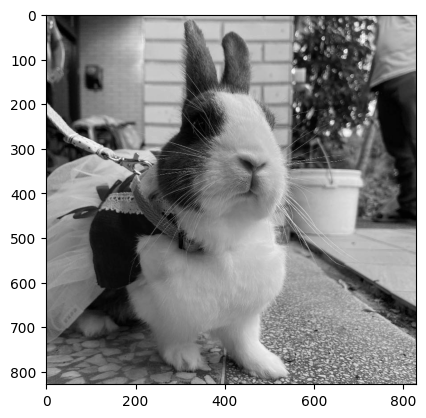

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("rabbit.jpg").convert ("L")
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")

In [ ]:
img_np.shape

(828, 828)

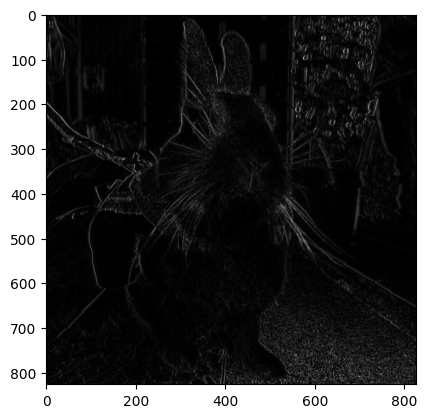

In [ ]:
def gx(ci, cj, img):
    w = [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_x = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_x[i-1][j-1] = gx(i, j, img_np)
new_x_norm = (new_x - new_x.min()) / (new_x.max() - new_x.min())
plt.imshow(new_x_norm, cmap="gray")

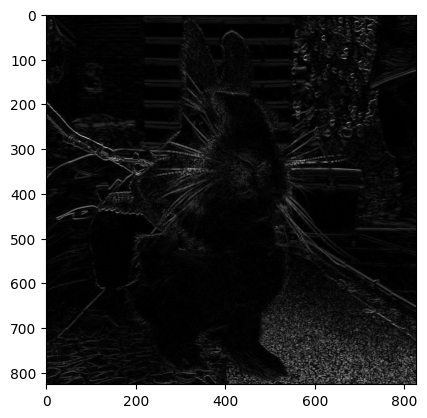

In [ ]:

def gy(ci, cj, img):
    w = [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_y = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_y[i-1][j-1] = gy(i, j, img_np)
new_y_norm = (new_y - new_y.min()) / (new_y.max() - new_y.min())
plt.imshow(new_y_norm, cmap="gray")

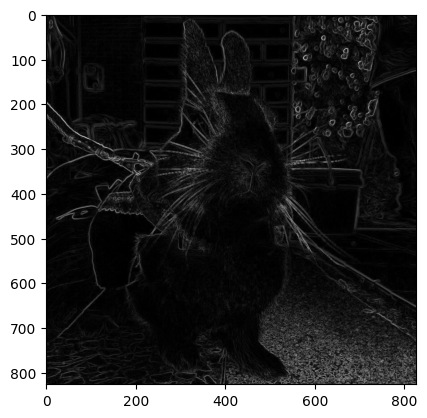

In [ ]:

new_total = (new_x_norm ** 2 + new_y_norm ** 2) ** 0.5
plt.imshow(new_total, cmap="gray")

### 👉**課堂額外講解**

In [ ]:
#為何MSE不是常數
import math
def sig(x):
    return 1/ (1 +math.exp(-1*x))

print(sig(0.13))
print("LOSS FUNCTION",str(0.47**2))

0.5324543063873187
LOSS FUNCTION 0.22089999999999999


### 👉**線上課程**


#### 1-6_實作1-1:下載並讀取Mnist手寫辨識資料集
* [Keras_常用數據_中文](https://keras.io/zh/datasets/)
* [Keras_常用數據_英文](https://keras.io/api/datasets/)

In [ ]:
import keras

In [ ]:
from keras.datasets.mnist import load_data
#資料結構 ((訓練題目,訓練答案), (測試題目,訓測試答案))
# load_data() #tuple1:訓練題目 #tuple2:訓練答案 #tuple3:測試題目 #tuple3:測試答案->

((x_train,y_train), (x_test, y_test))=load_data()

In [ ]:
#檢查資料 : 看訓練與測試資料有幾筆
#資料為黑白圖像，故無彩色通3，若有，則會顯示(60000, 28, 28,3)

print(x_train.shape) #(60000, 28, 28)->6萬筆題目，每個題目28*28圖象
print(y_train.shape) #(60000,) ->6萬筆題目
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


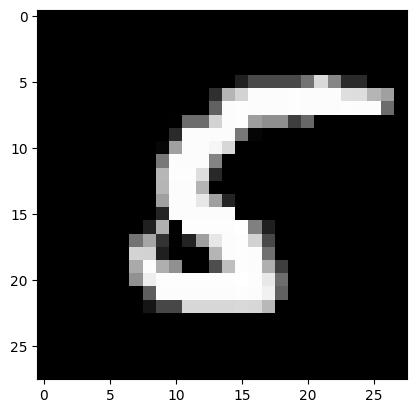

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c=random.randint(0, 59999)
plt.axis("off") #去掉軸的刻度
plt.imshow(x_train[c], cmap="gray") #顯示黑白圖

In [ ]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,73,73,115,217,134,42,42,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,252,253,252,252,252,222,221,181,160,0
7,0,0,0,0,0,0,0,0,0,0,...,252,253,252,252,252,253,252,252,108,0
8,0,0,0,0,0,0,0,0,0,0,...,143,62,103,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#1-7
#資料預處理
#1.題目預處理(Normalize)->將數值常態化
  #keras在準備隨機那組wights的時候，跟Normalize的圖片比較搭
  #1. 第一種方式:0~1；第二種方式: -1~1
  #2. 攤開x值(成為1D維)，目的是為了符合Keras MLP規定去運算
x_train_shape=x_train.reshape(60000,784)/255
x_test_shape=x_test.reshape(10000,784)/255

In [ ]:
#攤開後的樣子
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#2答案預處理[one-hot encoding]
#希望的樣子:[p0、p1...p9]
#5:[0,0,0,1,0,...,0]
#可能輸出: [0,0,0.2,0,0.8,0,0...,0]
from keras.utils.np_utils import to_categorical
y_train_cat=to_categorical(y_train) #one-hot之後的效果
y_test_cat=to_categorical(y_test)
print("原來",y_train[1])
print("後來",y_train_cat[1])

原來 0
後來 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
